<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Moonshot Strategy Code

The strategy code is provided in [first_last.py](first_last.py).

## Code highlights

In `prices_to_signals`, we extract the first half hour returns, including the overnight returns: 

```python

closes = prices.loc["Close"]
opens = prices.loc["Open"]
        
# Calculate first half-hour returns (including overnight return)
prior_closes = closes.xs('15:30:00', level="Time").shift()
ten_oclock_prices = opens.xs('10:00:00', level="Time")
first_half_hour_returns = (ten_oclock_prices - prior_closes) / prior_closes
```

Then calculate the penultimate half-hour returns:

```python
# Calculate penultimate half-hour returns
fifteen_oclock_prices = opens.xs('15:00:00', level="Time")
fifteen_thirty_prices = closes.xs('15:00:00', level="Time")
penultimate_half_hour_returns = (fifteen_thirty_prices - fifteen_oclock_prices) / fifteen_oclock_prices
```

We go long when both returns are positive and short when both are negative: 

```python
# long when both are positive, short when both are negative
long_signals = (first_half_hour_returns > 0) & (penultimate_half_hour_returns > 0)
short_signals = (first_half_hour_returns < 0) & (penultimate_half_hour_returns < 0)
```

This strategy is an example of an intraday strategy that only trades once a day. Accordingly, we utilize the convention of "reducing" the intraday DataFrame of prices to a daily DataFrame of signals through the use of the Pandas method `.xs()`, which isolates a particular time and in so doing drops the Time level from the index. See the usage guide for more details on the different conventions you can use for intraday strategies that trade once-a-day vs throughout-the-day. 


## Install strategy file

Moonshot looks for strategies inside the "moonshot" directory, so execute the following cell to "install" the strategy by moving the file to that location: 

In [1]:
# make directory if doesn't exist
!mkdir -p /codeload/moonshot

!mv first_last.py /codeload/moonshot/

## Run backtest

Next we can run the backtest:

In [2]:
from quantrocket.moonshot import backtest
backtest("first-last", filepath_or_buffer="first_last.csv")

And view the performance. Most of the strategy's profitability came during the financial crisis.

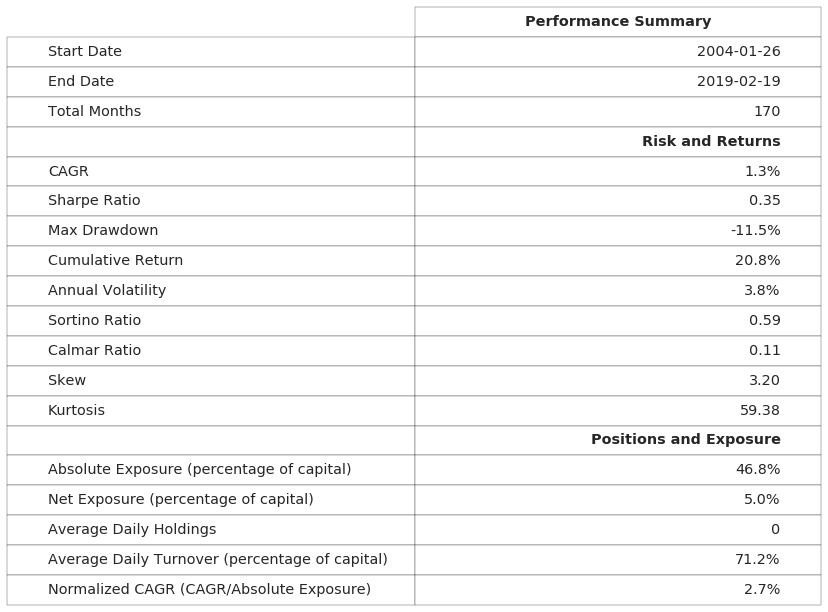

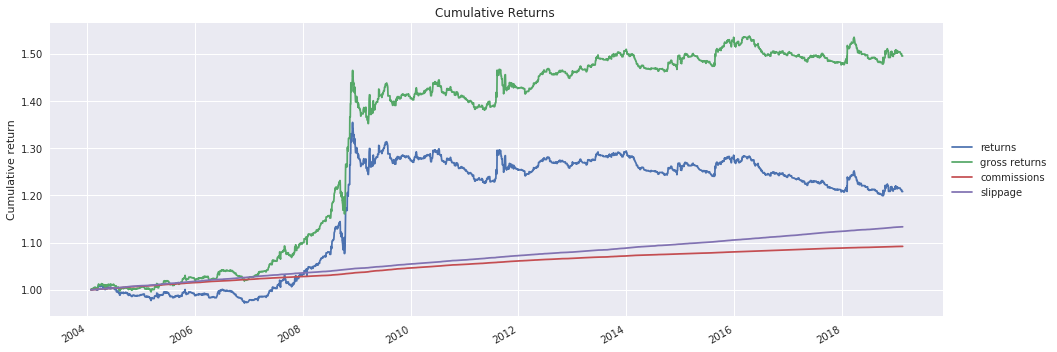

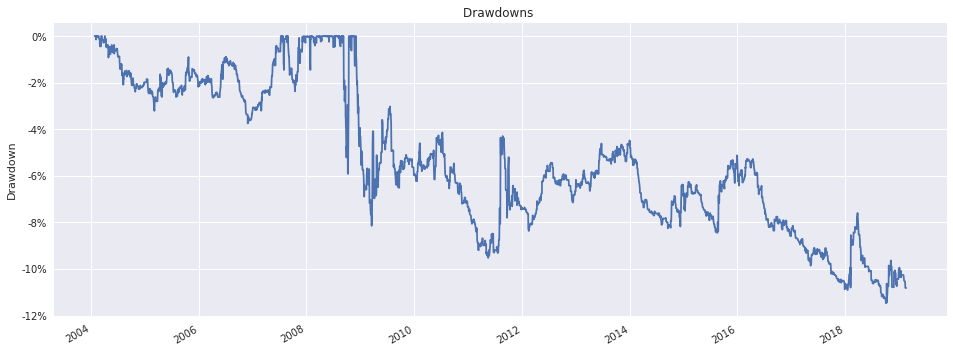

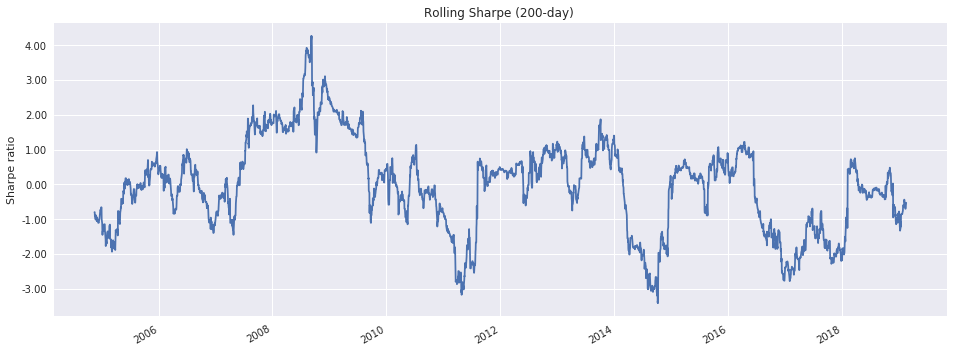

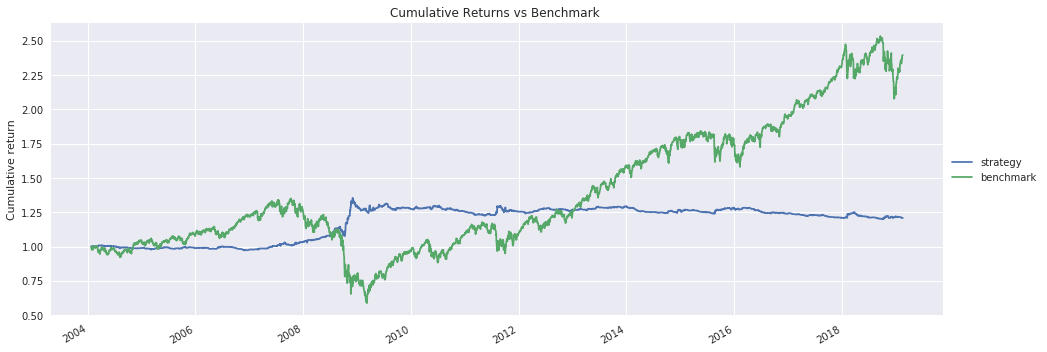

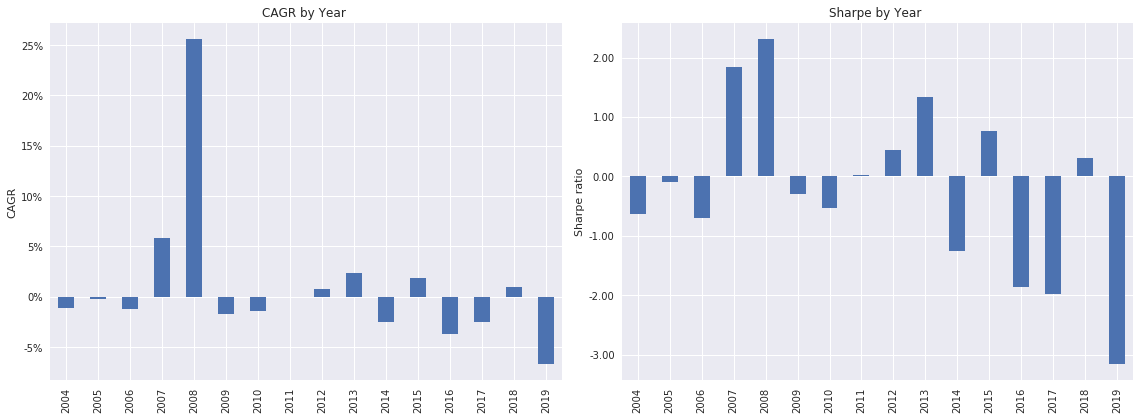

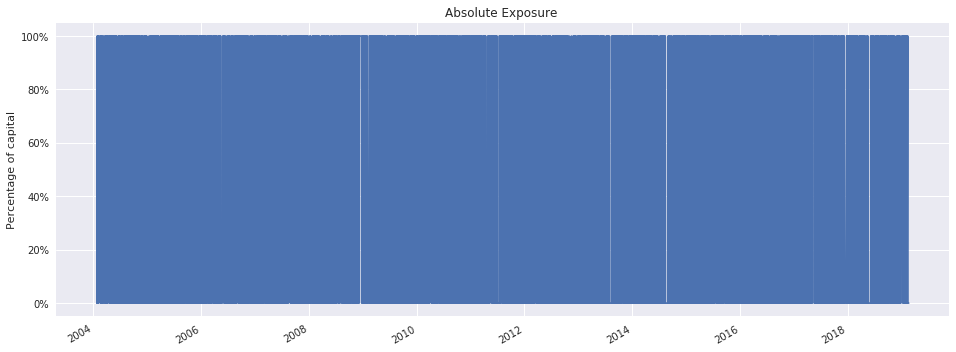

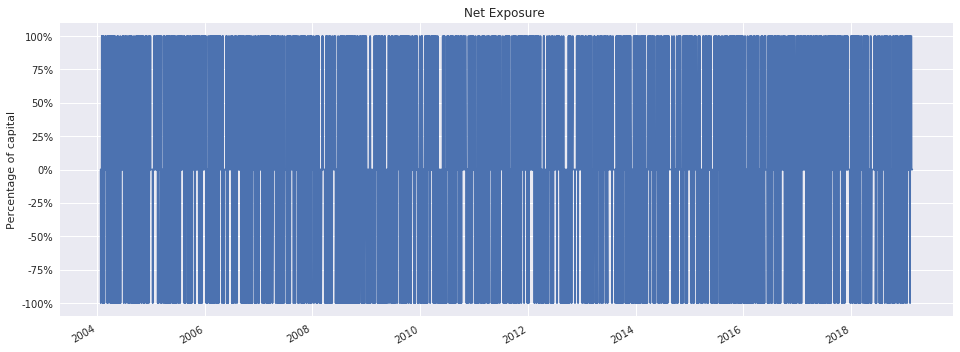

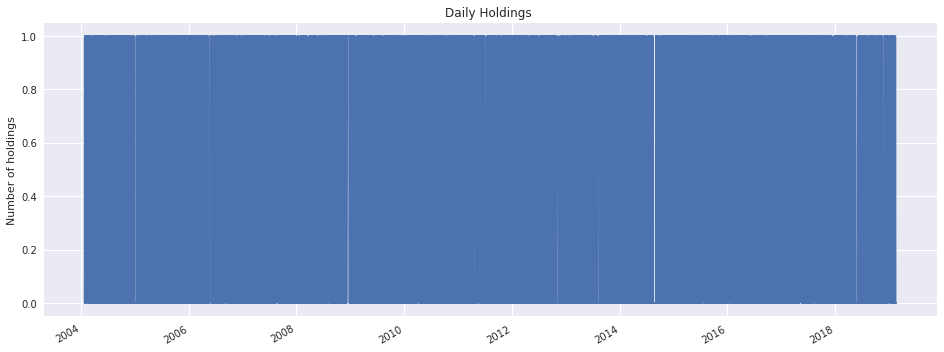

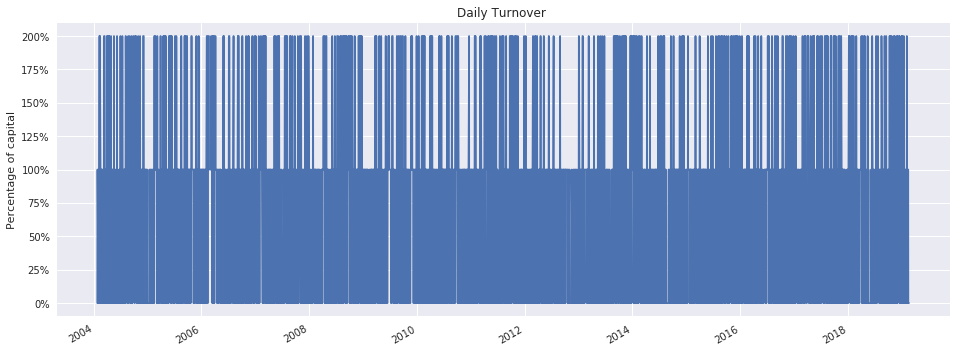

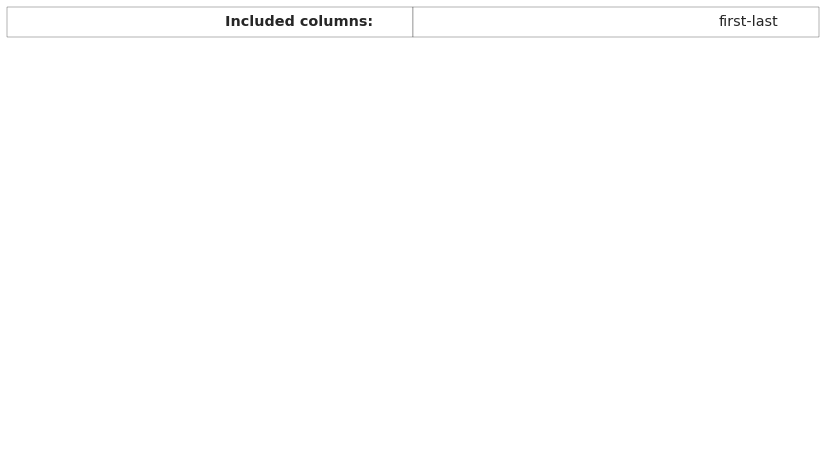

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("first_last.csv")

***

## *Next Up*

Part 3: [VIX Data Collection](Part3-VIX-Data-Collection.ipynb)